In [2]:
!pip3 install plotly

'pip3'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import cufflinks as cf
import numpy as np

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

plt.style.use('ggplot')
import warnings
warnings.filterwarnings(action = 'ignore')

In [4]:
matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic')
# 주피터 노트북을 사용하는 경우에는 다음처럼 매직(magic) 명령으로 노트북 내부에 그림을 표시하도록 지정해야 한다.
%matplotlib.inline

pd.options.display.max_rows = None 
pd.options.display.max_columns = None 
matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic')
%matplotlib inline

UsageError: Line magic function `%matplotlib.inline` not found.


# 데이터 불러오기

In [5]:
data=pd.read_csv('data/201901-202003.csv')

In [6]:
sub = pd.read_csv('submission.csv')

In [7]:
data.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [8]:
data.tail()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
24697787,202003,충북,충주시,휴양콘도 운영업,충북,충주시,30s,1,2,3,43300,4
24697788,202003,충북,충주시,휴양콘도 운영업,충북,충주시,40s,1,3,3,35000,3
24697789,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,1,4,4,188000,6
24697790,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,2,4,4,99000,6
24697791,202003,충북,충주시,휴양콘도 운영업,충북,충주시,60s,1,5,3,194000,3


# Project Scoping(Define Problem)

- 주제 : AI알고리즘 활용 카드 사용 금액 예측
- 목표 : 신용카드 사용 내역 데이터를 활용한 지역별, 업종별 월간 카드 사용 총액 예측
- 배경 : 신용카드 사용량 분석을 통한 "Post COVID-19시대" 신용카드 사용량 예측 모델 개발, 지역 경제 위축 및 중소상공인 경영난 해소를 위한 대책 마련


# Data Collection(데이터 수집)

In [ ]:
# 외부 데이터
# 보류

# 탐색적 데이터 분석(EDA)

- REG_YYMM : 년월
- CARD_SIDO_NM : 카드이용지역_시도(가맹점 주소 기준)
- CARD_CCG_NM : 카드이용지역_시군구(가맹점 주소 기준)
- STD_CLSS_NM : 업종명
- HOM_SIDO_NM : 거주지역 시도(고객 집주소 기준)
- HOM_CCG_NM : 거주지역_시군구(고객 집주소 기준)
- AGE : 연령대
- SEX_CTGO_CD : 성별(1 : 남성, 2 : 여성)
- FLC : 가구생애주기(1 : 1인가구, 2 : 영유아자녀기구, 3 : 중고생자녀가구, 4 : 성인자녀가구, 5 : 노년가구)
- CSTMR_CNT : 이용고객수(명)
- AMT : 이용금액(원)
- CNT : 이용건수(건)


In [9]:
data.shape # 2400만개 데이터, 12개의 컬럼

(24697792, 12)

In [10]:
data.describe()

,REG_YYMM,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
count,2.469779e+07,2.469779e+07,2.469779e+07,2.469779e+07,2.469779e+07,2.469779e+07
mean,2.019231e+05,1.412645e+00,2.804429e+00,6.196855e+01,2.441353e+06,1.260450e+02
std,3.619561e+01,4.923099e-01,1.375455e+00,3.559175e+02,1.726096e+07,9.669387e+02
min,2.019010e+05,1.000000e+00,1.000000e+00,3.000000e+00,2.000000e+01,1.000000e+00
25%,2.019040e+05,1.000000e+00,2.000000e+00,4.000000e+00,9.020000e+04,5.000000e+00
50%,2.019080e+05,1.000000e+00,3.000000e+00,8.000000e+00,2.526800e+05,1.200000e+01
75%,2.019110e+05,2.000000e+00,4.000000e+00,2.400000e+01,8.433372e+05,4.000000e+01
max,2.020030e+05,2.000000e+00,5.000000e+00,3.281300e+04,2.349524e+09,1.203570e+05


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 12 columns):
REG_YYMM        int64
CARD_SIDO_NM    object
CARD_CCG_NM     object
STD_CLSS_NM     object
HOM_SIDO_NM     object
HOM_CCG_NM      object
AGE             object
SEX_CTGO_CD     int64
FLC             int64
CSTMR_CNT       int64
AMT             int64
CNT             int64
dtypes: int64(6), object(6)
memory usage: 2.2+ GB


In [12]:
data.isna().sum() # 두 컬림이 null값이 꽤 있지만 2400만개에 비하면 적은 숫자
# -> 일단 처리하기 힘드므로 삭제
# 평균대체? 중간값 대체?

REG_YYMM             0
CARD_SIDO_NM         0
CARD_CCG_NM      87213
STD_CLSS_NM          0
HOM_SIDO_NM          0
HOM_CCG_NM      147787
AGE                  0
SEX_CTGO_CD          0
FLC                  0
CSTMR_CNT            0
AMT                  0
CNT                  0
dtype: int64

- 불필요한 컬럼 제거

In [13]:
data = data.drop("CARD_CCG_NM", axis=1)
data = data.drop("HOM_SIDO_NM", axis=1)
data.head()

,REG_YYMM,CARD_SIDO_NM,STD_CLSS_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,건강보조식품 소매업,강릉시,20s,1,1,4,311200,4
1,201901,강원,건강보조식품 소매업,강릉시,30s,1,2,7,1374500,8
2,201901,강원,건강보조식품 소매업,강릉시,30s,2,2,6,818700,6
3,201901,강원,건강보조식품 소매업,강릉시,40s,1,3,4,1717000,5
4,201901,강원,건강보조식품 소매업,강릉시,40s,1,4,3,1047300,3


##### REG_YYMM -> year, month로 분리하기

In [14]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [15]:
data = data.fillna('')
data['year'] = data['REG_YYMM'].apply(lambda x: grap_year(x))
data['month'] = data['REG_YYMM'].apply(lambda x: grap_month(x))
data = data.drop(['REG_YYMM'], axis=1)

In [16]:
data

,CARD_SIDO_NM,STD_CLSS_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT,year,month
0,강원,건강보조식품 소매업,강릉시,20s,1,1,4,311200,4,2019,1
1,강원,건강보조식품 소매업,강릉시,30s,1,2,7,1374500,8,2019,1
2,강원,건강보조식품 소매업,강릉시,30s,2,2,6,818700,6,2019,1
3,강원,건강보조식품 소매업,강릉시,40s,1,3,4,1717000,5,2019,1
4,강원,건강보조식품 소매업,강릉시,40s,1,4,3,1047300,3,2019,1
...,...,...,...,...,...,...,...,...,...,...,...
24697787,충북,휴양콘도 운영업,충주시,30s,1,2,3,43300,4,2020,3
24697788,충북,휴양콘도 운영업,충주시,40s,1,3,3,35000,3,2020,3
24697789,충북,휴양콘도 운영업,충주시,50s,1,4,4,188000,6,2020,3
24697790,충북,휴양콘도 운영업,충주시,50s,2,4,4,99000,6,2020,3


##### year, month별 시도별로 그룹화(AMT, CNT)

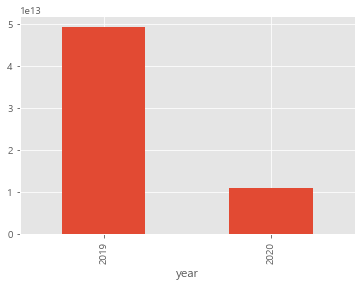

In [17]:
data.groupby('year')['AMT'].sum().plot(kind='bar')

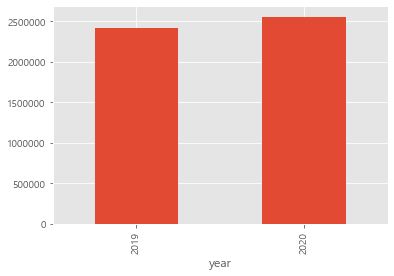

In [18]:
data.groupby('year')['AMT'].mean().plot(kind='bar')

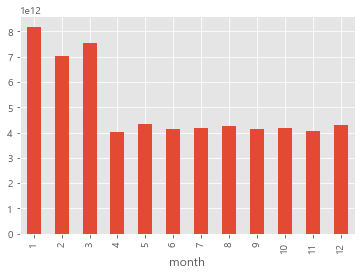

In [19]:
data.groupby('month')['AMT'].sum().plot(kind='bar')

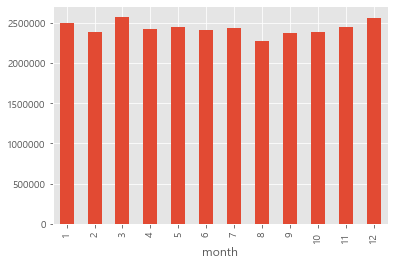

In [20]:
data.groupby('month')['AMT'].mean().plot(kind='bar')

##### 시도별로 그룹화

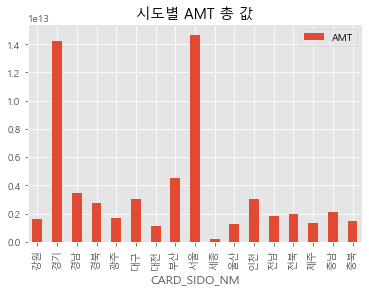

In [21]:
city_sum = pd.DataFrame(data.groupby("CARD_SIDO_NM")["AMT"].sum())
city_sum.plot(kind='bar', title='시도별 AMT 총 값')

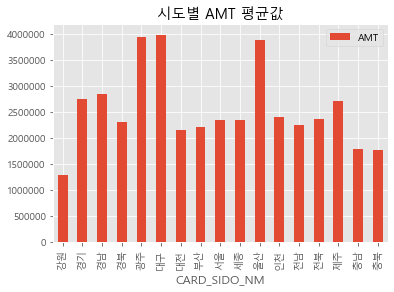

In [22]:
city_mean = pd.DataFrame(data.groupby("CARD_SIDO_NM")["AMT"].mean())
city_mean.plot(kind='bar', title = '시도별 AMT 평균값')

##### 업종별 등장 빈도수

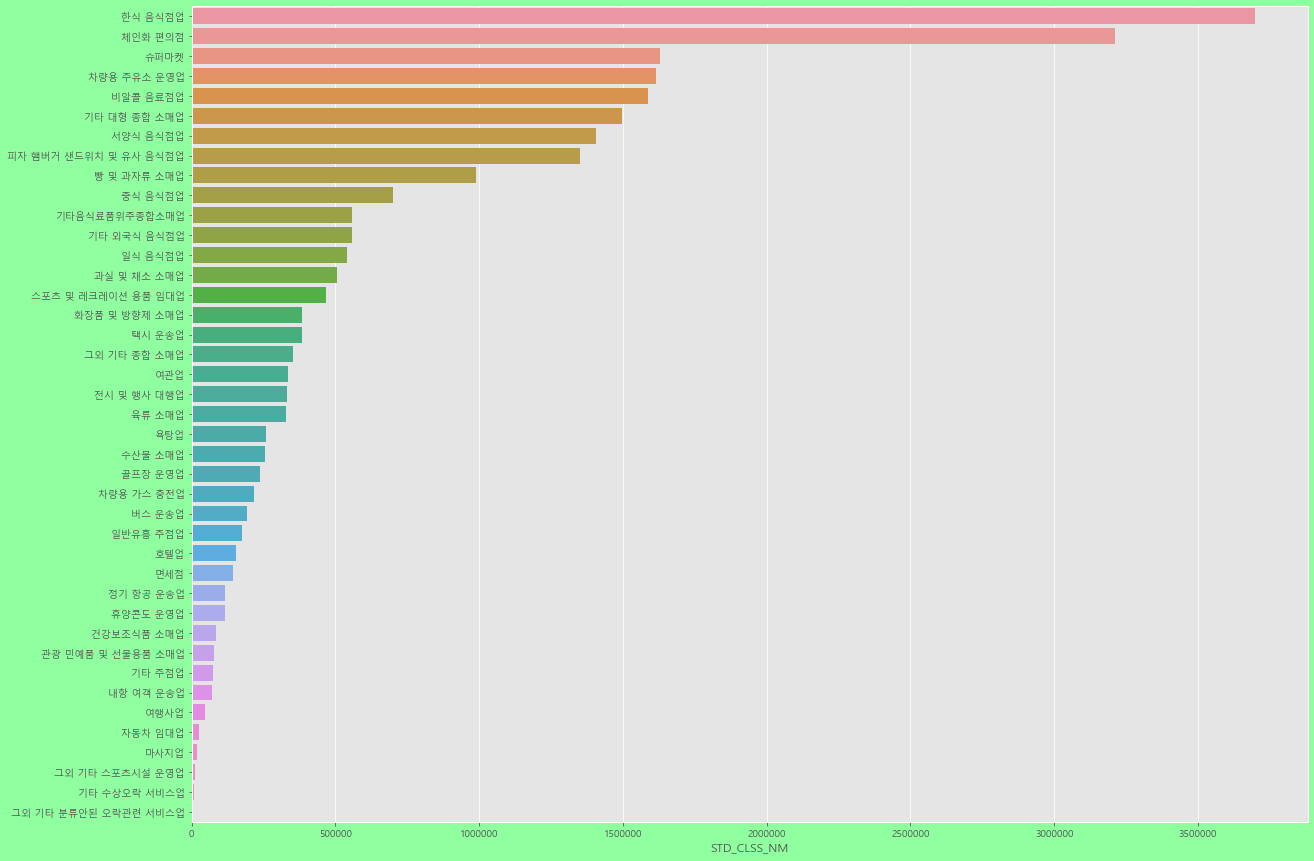

In [23]:
# 업종별 등장 빈도수
fig = plt.figure(figsize=(20, 15))
fig.patch.set_facecolor('xkcd:mint green')
sns.barplot(y=data['STD_CLSS_NM'].value_counts().index,x=data['STD_CLSS_NM'].value_counts())
#plt.tight_layout()

# 한식 음식점, 편의점이 압도적임

##### sex, age 별 그룹화

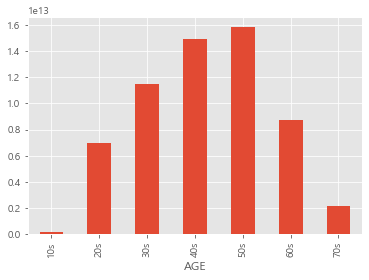

In [24]:
data.groupby('AGE')['AMT'].sum().plot(kind='bar')
# 4-50대 > 30, 60대 > 20대 > 70대 > 10대

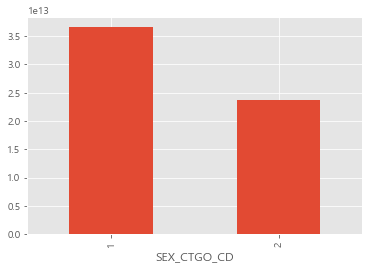

In [25]:
data.groupby('SEX_CTGO_CD')['AMT'].sum().plot(kind='bar')
# 남자가 소비가 더 많음

##### FLC 가구생애주기별 묶기

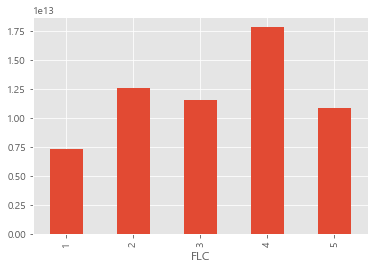

In [26]:
data.groupby('FLC')['AMT'].sum().plot(kind='bar')
# 성인자녀가구가 가장 많음

# Data Preprocessing

- 불필요한 컬럼 제거

In [27]:
# 인코딩
dtypes = data.dtypes
encoders = {}
for column in data.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(data[column])
        encoders[column] = encoder
        
df_num = data.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_num[column] = encoder.transform(data[column])

In [28]:
encoders

{'CARD_SIDO_NM': LabelEncoder(),
 'STD_CLSS_NM': LabelEncoder(),
 'HOM_CCG_NM': LabelEncoder(),
 'AGE': LabelEncoder()}

# Feature Engineering

##### 새로운 변수 창출

- CNT - CSTMR_CNT = ?
- CNT / CSTMR_CNT = ?

In [ ]:
data['gap'] = data['CNT']-data['CSTMR_CNT']
data['rate'] = data['CNT']/data['CSTMR_CNT']
data.head()
data2 = data.groupby('CARD_SIDO_NM')['CSTMR_CNT','AMT','CNT','gap','rate'].sum()

# Modeling

In [30]:
# feature, target 설정
train_num = df_num.sample(frac=1, random_state=0)
train_features = train_num.drop(['CSTMR_CNT', 'AMT', 'CNT'], axis=1)
train_target = np.log1p(train_num['AMT'])

In [ ]:
# 훈련
model = RandomForestRegressor(n_jobs=-1, random_state=0)
model.fit(train_features, train_target)
print(model.history['loss'])
print(model.history['acc'])
print(model.history['val_loss'])
print(model.history['val_acc'])

In [ ]:
# 예측
pred = model.predict(data)
pred = np.expm1(pred)
data['AMT'] = np.round(pred, 0)
data['REG_YYMM'] = data['year']*100 + data['month']
data = data[['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM', 'AMT']]
data = data.groupby(['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM']).sum().reset_index(drop=False)

In [ ]:
# 디코딩 
temp['CARD_SIDO_NM'] = encoders['CARD_SIDO_NM'].inverse_transform(temp['CARD_SIDO_NM'])
temp['STD_CLSS_NM'] = encoders['STD_CLSS_NM'].inverse_transform(temp['STD_CLSS_NM'])

- feature1 -> lgbm
- feature2 -> random forests
- feature3 -> linear regression

- ensamble

- 과적합 판단

# Evaluation

In [ ]:
# 제출 파일 만들기
submission = pd.read_csv('data/submission.csv', index_col=0)
submission = submission.drop(['AMT'], axis=1)
submission = submission.merge(temp, left_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], right_on=['REG_YYMM', 'CARD_SIDO_NM', 'STD_CLSS_NM'], how='left')
submission.index.name = 'id'
submission.to_csv('submission2.csv', encoding='utf-8-sig')
submission.head()

# Project Delivery / Insights